In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup paths
project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root / 'src'))

from preprocessing.analyze_frame_distribution import (
    analyze_all_videos,
    compute_statistics,
    print_summary
)

print(f"Project root: {project_root}")

# Set plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

Project root: /mnt/d/Graduation_Project/ai-virtual-coach


## 1. Analyze Front View Videos

In [2]:
CLIPS_PATH = project_root / 'datasets' / 'Clips'

print("Analyzing front view videos...")
df_front = analyze_all_videos(str(CLIPS_PATH), view='front')

print(f"\n✅ Analyzed {len(df_front)} front view videos")
print(f"Exercises: {df_front['exercise'].nunique()}")
print(f"Subjects: {df_front['subject_id'].nunique()}")

df_front.head()

Analyzing front view videos...


Analyzing front videos: 100%|██████████| 15/15 [01:53<00:00,  7.57s/it]


✅ Analyzed 1574 front view videos
Exercises: 15
Subjects: 49


,video_path,video_name,exercise,subject_id,view,total_frames,fps,duration_sec,width,height
0,/mnt/d/Graduation_Project/ai-virtual-coach/dat...,Front view V1-seg01.mp4,Dumbbell shoulder press,volunteer_001,front,65,30.0,2.166667,720,1280
1,/mnt/d/Graduation_Project/ai-virtual-coach/dat...,Front view V1-seg02.mp4,Dumbbell shoulder press,volunteer_001,front,63,30.0,2.100000,720,1280
2,/mnt/d/Graduation_Project/ai-virtual-coach/dat...,Front view V1-seg03.mp4,Dumbbell shoulder press,volunteer_001,front,58,30.0,1.933333,720,1280
3,/mnt/d/Graduation_Project/ai-virtual-coach/dat...,Front view V1-seg04.mp4,Dumbbell shoulder press,volunteer_001,front,56,30.0,1.866667,720,1280
4,/mnt/d/Graduation_Project/ai-virtual-coach/dat...,Front view V1-seg05.mp4,Dumbbell shoulder press,volunteer_001,front,46,30.0,1.533333,720,1280


## 2. Compute Statistics

In [3]:
stats_front = compute_statistics(df_front)
print_summary(stats_front, 'front')


FRAME DISTRIBUTION ANALYSIS - FRONT VIEW

📊 Overall Statistics (1574 videos):
  Frame Count:
    Min:    24
    Max:    391
    Mean:   87.3
    Median: 73.0  ⭐ (Recommended T_fixed)
    Std:    49.7
    P25:    55.0
    P75:    100.0
    P90:    148.0
    P95:    189.3

  Duration:
    Min:    0.80s
    Max:    6.52s
    Mean:   2.53s
    Median: 2.37s

  FPS:
    Unique: [23.14814814814815, 23.80952380952381, 24.0, 24.019607843137255, 24.03846153846154, 24.074074074074073, 24.09090909090909, 24.107142857142858, 24.12280701754386, 24.152542372881356, 24.18032786885246, 24.404761904761905, 24.46808510638298, 24.479166666666668, 24.489795918367346, 27.894736842105264, 28.89137737961926, 28.94736842105263, 29.085872576177284, 29.111842105263158, 29.1866028708134, 29.290617848970253, 29.355077835433654, 29.4010889292196, 29.425837320574164, 29.43800178412132, 29.473684210526315, 29.49681897050318, 29.50413223140496, 29.513034923757992, 29.519450800915333, 29.550941574118784, 29.563269876

## 3. Visualize Frame Count Distribution

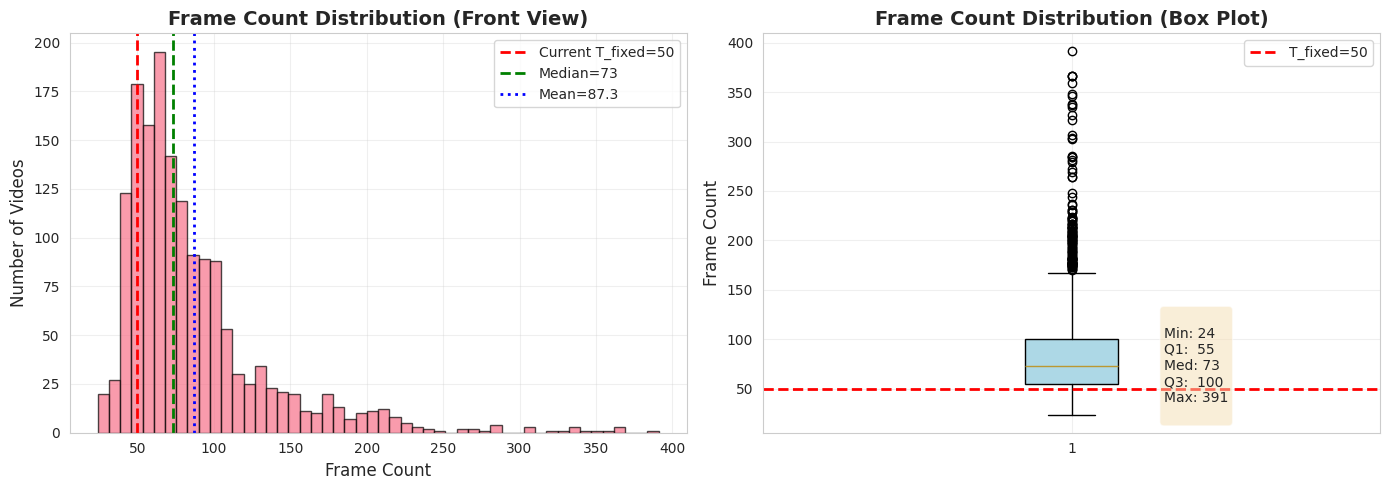


📊 Key Insights:
  - Median frame count: 73
  - Mean frame count: 87.3
  - Standard deviation: 49.7
  - Current T_fixed (50) is BELOW median


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax = axes[0]
ax.hist(df_front['total_frames'], bins=50, edgecolor='black', alpha=0.7)
ax.axvline(50, color='red', linestyle='--', linewidth=2, label='Current T_fixed=50')
ax.axvline(df_front['total_frames'].median(), color='green', linestyle='--', linewidth=2, 
           label=f'Median={df_front["total_frames"].median():.0f}')
ax.axvline(df_front['total_frames'].mean(), color='blue', linestyle=':', linewidth=2,
           label=f'Mean={df_front["total_frames"].mean():.1f}')
ax.set_xlabel('Frame Count', fontsize=12)
ax.set_ylabel('Number of Videos', fontsize=12)
ax.set_title('Frame Count Distribution (Front View)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Box plot with statistics
ax = axes[1]
bp = ax.boxplot(df_front['total_frames'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
ax.axhline(50, color='red', linestyle='--', linewidth=2, label='T_fixed=50')
ax.set_ylabel('Frame Count', fontsize=12)
ax.set_title('Frame Count Distribution (Box Plot)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Add text with statistics
stats_text = f"""
Min: {df_front['total_frames'].min():.0f}
Q1:  {df_front['total_frames'].quantile(0.25):.0f}
Med: {df_front['total_frames'].median():.0f}
Q3:  {df_front['total_frames'].quantile(0.75):.0f}
Max: {df_front['total_frames'].max():.0f}
"""
ax.text(1.15, df_front['total_frames'].median(), stats_text, 
        fontsize=10, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n📊 Key Insights:")
print(f"  - Median frame count: {df_front['total_frames'].median():.0f}")
print(f"  - Mean frame count: {df_front['total_frames'].mean():.1f}")
print(f"  - Standard deviation: {df_front['total_frames'].std():.1f}")
print(f"  - Current T_fixed (50) is {'BELOW' if 50 < df_front['total_frames'].median() else 'ABOVE'} median")

## 4. Per-Exercise Analysis

In [5]:
# Create summary by exercise
exercise_summary = df_front.groupby('exercise').agg({
    'total_frames': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'duration_sec': ['mean', 'median'],
    'fps': 'mean'
}).round(2)

exercise_summary.columns = ['_'.join(col).strip() for col in exercise_summary.columns.values]
exercise_summary = exercise_summary.sort_values('total_frames_median', ascending=False)

print("Per-Exercise Frame Count Summary:")
exercise_summary

Per-Exercise Frame Count Summary:


,total_frames_count,total_frames_mean,total_frames_median,total_frames_std,total_frames_min,total_frames_max,duration_sec_mean,duration_sec_median,fps_mean
exercise,,,,,,,,,
EZ Bar Curls,109,127.13,117.0,49.66,54,217,2.86,2.90,44.27
Standing Dumbbell Front Raises,115,154.48,113.0,86.80,82,391,4.09,3.77,35.99
Inclined Dumbbell Bench Press,119,110.02,104.0,40.66,49,223,2.62,2.45,42.83
Weighted Sqauts,88,112.17,97.5,45.24,51,229,3.02,3.09,37.13
Overhead Triceps Extension,109,112.87,93.0,55.73,52,272,3.04,3.03,36.04
Shrugs,96,87.54,85.0,23.41,51,145,2.92,2.83,30.00
Bulgarian split squat,93,81.35,75.0,29.22,37,161,2.40,2.40,33.89
Seated biceps curls,89,71.82,73.0,16.44,41,107,2.39,2.41,30.02
Deadlift,85,71.24,69.0,16.98,40,117,2.37,2.30,30.01


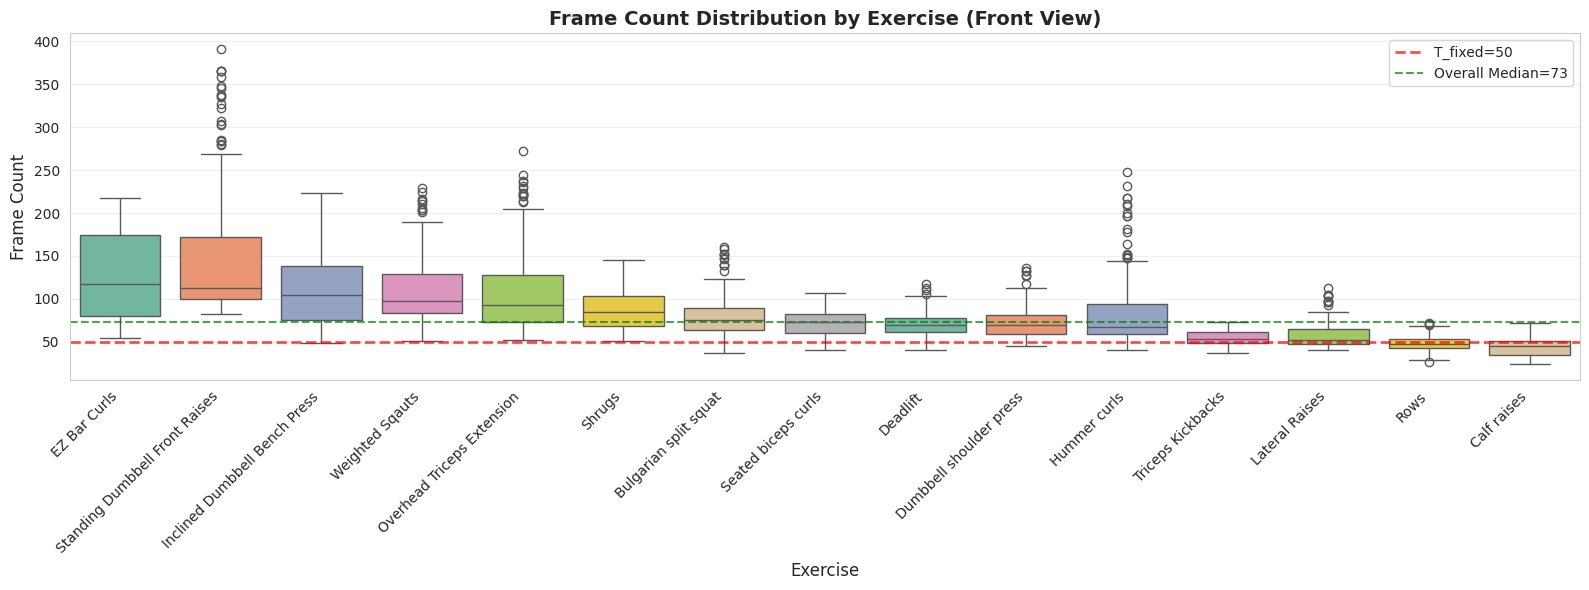

In [6]:
# Box plot per exercise
plt.figure(figsize=(16, 6))
exercise_order = df_front.groupby('exercise')['total_frames'].median().sort_values(ascending=False).index

sns.boxplot(data=df_front, x='exercise', y='total_frames', order=exercise_order, palette='Set2')
plt.axhline(50, color='red', linestyle='--', linewidth=2, label='T_fixed=50', alpha=0.7)
plt.axhline(df_front['total_frames'].median(), color='green', linestyle='--', linewidth=1.5, 
            label=f'Overall Median={df_front["total_frames"].median():.0f}', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Exercise', fontsize=12)
plt.ylabel('Frame Count', fontsize=12)
plt.title('Frame Count Distribution by Exercise (Front View)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. FPS Analysis

FPS Distribution:
fps
23.148148      1
23.809524      1
24.000000      1
24.019608      1
24.038462      1
            ... 
30.882353      1
59.677419      1
59.940060    136
60.000000     44
60.007000     12
Name: count, Length: 192, dtype: int64


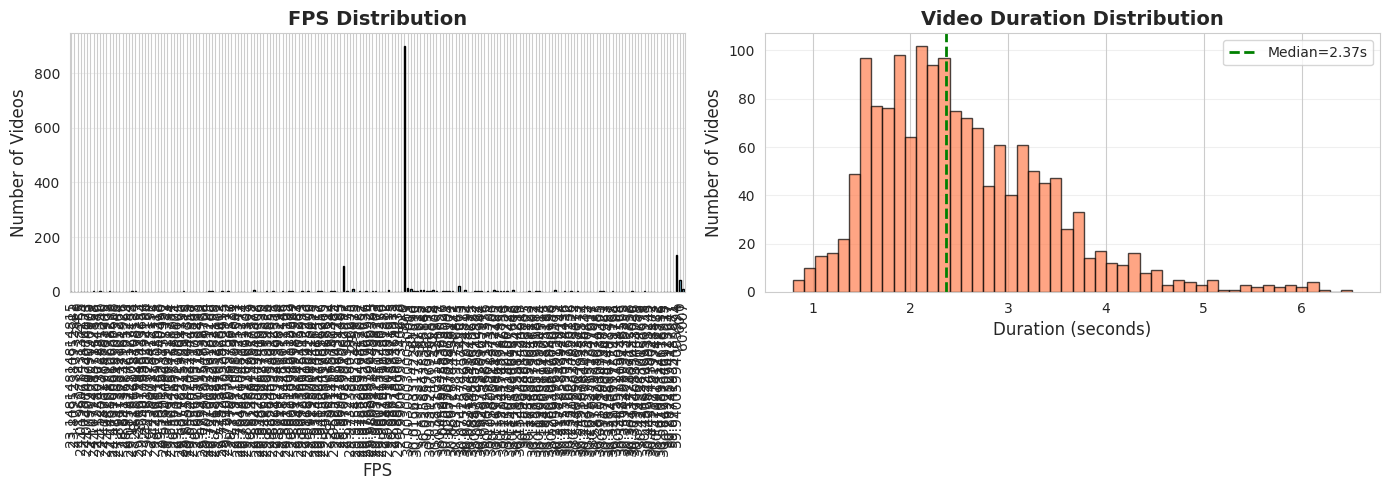


⏱️ Duration Statistics:
  - Min:    0.80s
  - Median: 2.37s
  - Mean:   2.53s
  - Max:    6.52s


In [7]:
print("FPS Distribution:")
print(df_front['fps'].value_counts().sort_index())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# FPS distribution
ax = axes[0]
fps_counts = df_front['fps'].value_counts().sort_index()
fps_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
ax.set_xlabel('FPS', fontsize=12)
ax.set_ylabel('Number of Videos', fontsize=12)
ax.set_title('FPS Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Duration distribution
ax = axes[1]
ax.hist(df_front['duration_sec'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax.axvline(df_front['duration_sec'].median(), color='green', linestyle='--', linewidth=2,
           label=f'Median={df_front["duration_sec"].median():.2f}s')
ax.set_xlabel('Duration (seconds)', fontsize=12)
ax.set_ylabel('Number of Videos', fontsize=12)
ax.set_title('Video Duration Distribution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n⏱️ Duration Statistics:")
print(f"  - Min:    {df_front['duration_sec'].min():.2f}s")
print(f"  - Median: {df_front['duration_sec'].median():.2f}s")
print(f"  - Mean:   {df_front['duration_sec'].mean():.2f}s")
print(f"  - Max:    {df_front['duration_sec'].max():.2f}s")

## 6. Test Different T_fixed Values

Impact of Different T_fixed Values:

 T_fixed |  % Downsample |  % Upsample |  % Close (±10%)
-------------------------------------------------------
      32 |         98.5% |        1.3% |            1.7%
      50 |         82.6% |       15.7% |           17.7%
      64 |         61.6% |       36.7% |           19.4%
      80 |         40.8% |       57.9% |           16.8%
     100 |         24.8% |       74.3% |           14.1%


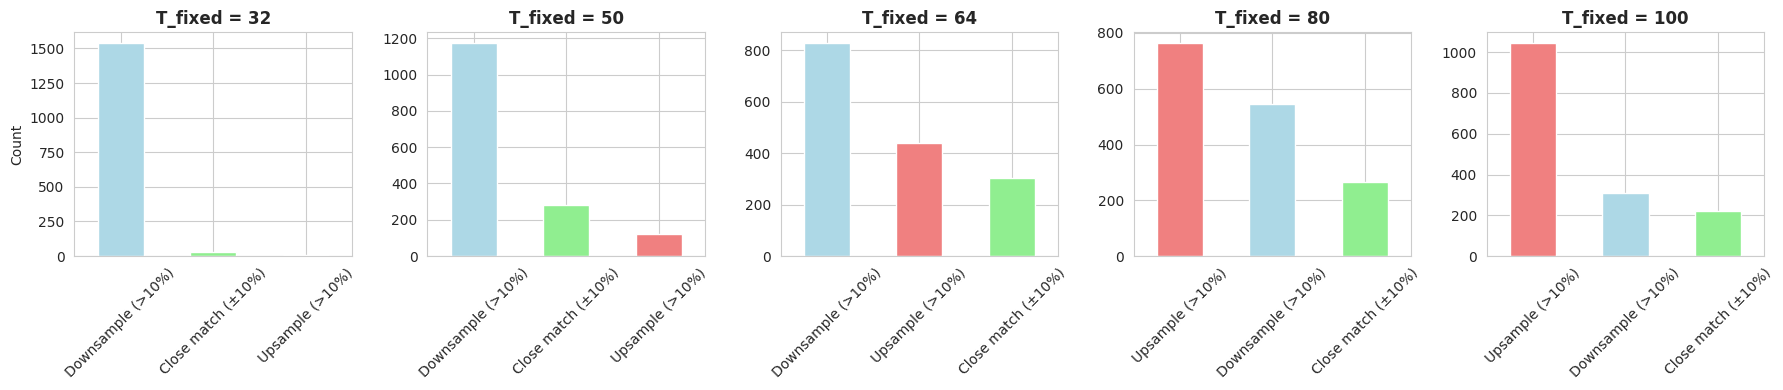

In [8]:
# Test different T_fixed values
T_FIXED_OPTIONS = [32, 50, 64, 80, 100]

print("Impact of Different T_fixed Values:\n")
print(f"{'T_fixed':>8} | {'% Downsample':>13} | {'% Upsample':>11} | {'% Close (±10%)':>15}")
print("-" * 55)

for T_fixed in T_FIXED_OPTIONS:
    downsample = (df_front['total_frames'] > T_fixed).sum()
    upsample = (df_front['total_frames'] < T_fixed).sum()
    close_match = ((df_front['total_frames'] >= T_fixed * 0.9) & 
                   (df_front['total_frames'] <= T_fixed * 1.1)).sum()
    
    pct_down = downsample / len(df_front) * 100
    pct_up = upsample / len(df_front) * 100
    pct_close = close_match / len(df_front) * 100
    
    print(f"{T_fixed:>8} | {pct_down:>12.1f}% | {pct_up:>10.1f}% | {pct_close:>14.1f}%")

# Visualization
fig, axes = plt.subplots(1, len(T_FIXED_OPTIONS), figsize=(18, 4))

for idx, T_fixed in enumerate(T_FIXED_OPTIONS):
    ax = axes[idx]
    
    # Categorize each video
    categories = []
    for frames in df_front['total_frames']:
        if frames < T_fixed * 0.9:
            categories.append('Upsample (>10%)')
        elif frames > T_fixed * 1.1:
            categories.append('Downsample (>10%)')
        else:
            categories.append('Close match (±10%)')
    
    category_counts = pd.Series(categories).value_counts()
    colors = {'Upsample (>10%)': 'lightcoral', 
              'Downsample (>10%)': 'lightblue', 
              'Close match (±10%)': 'lightgreen'}
    
    category_counts.plot(kind='bar', ax=ax, color=[colors[x] for x in category_counts.index])
    ax.set_title(f'T_fixed = {T_fixed}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count' if idx == 0 else '')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 7. Recommendations

In [9]:
median_frames = df_front['total_frames'].median()
mean_frames = df_front['total_frames'].mean()

print("🎯 T_fixed RECOMMENDATIONS\n")
print("="*60)

# Find closest practical value
practical_values = [32, 50, 64, 80, 100]
closest_to_median = min(practical_values, key=lambda x: abs(x - median_frames))
closest_to_mean = min(practical_values, key=lambda x: abs(x - mean_frames))

print(f"1. Based on MEDIAN frame count ({median_frames:.0f}):")
print(f"   → Recommended T_fixed: {closest_to_median}")
print(f"   → Reason: Minimizes overall interpolation/downsampling")

print(f"\n2. Based on MEAN frame count ({mean_frames:.1f}):")
print(f"   → Recommended T_fixed: {closest_to_mean}")

print(f"\n3. Current T_fixed (50):")
if 45 <= median_frames <= 55:
    print(f"   ✅ Reasonable choice - close to median")
else:
    diff_pct = abs(50 - median_frames) / median_frames * 100
    print(f"   ⚠️ {diff_pct:.1f}% different from median")
    print(f"   → Consider changing to {closest_to_median}")

print(f"\n4. Tempo Preservation:")
print(f"   ✅ Implemented via separate tempo features:")
print(f"      - tempo_duration_sec (FPS-normalized)")
print(f"      - tempo_frame_count (raw)")
print(f"      - tempo_fps (original FPS)")
print(f"   → Temporal resampling does NOT lose tempo information!")

print(f"\n5. Power of 2 Consideration:")
print(f"   - 32:  Significant downsampling for most videos")
print(f"   - 64:  Good balance, efficient for some architectures")
print(f"   - 128: Upsampling for most videos")

print("\n" + "="*60)
print("FINAL RECOMMENDATION:")
print("="*60)
if closest_to_median == 50:
    print(f"✅ Keep T_fixed = 50 (current value is optimal)")
else:
    print(f"🔄 Consider changing T_fixed to {closest_to_median}")
    print(f"   (Closer to median, better data representation)")
print("="*60)

🎯 T_fixed RECOMMENDATIONS

1. Based on MEDIAN frame count (73):
   → Recommended T_fixed: 80
   → Reason: Minimizes overall interpolation/downsampling

2. Based on MEAN frame count (87.3):
   → Recommended T_fixed: 80

3. Current T_fixed (50):
   ⚠️ 31.5% different from median
   → Consider changing to 80

4. Tempo Preservation:
   ✅ Implemented via separate tempo features:
      - tempo_duration_sec (FPS-normalized)
      - tempo_frame_count (raw)
      - tempo_fps (original FPS)
   → Temporal resampling does NOT lose tempo information!

5. Power of 2 Consideration:
   - 32:  Significant downsampling for most videos
   - 64:  Good balance, efficient for some architectures
   - 128: Upsampling for most videos

FINAL RECOMMENDATION:
🔄 Consider changing T_fixed to 80
   (Closer to median, better data representation)


## 8. Side View Analysis (Optional)

In [10]:
print("Analyzing side view videos...")
df_side = analyze_all_videos(str(CLIPS_PATH), view='side')

print(f"\n✅ Analyzed {len(df_side)} side view videos")

stats_side = compute_statistics(df_side)
print_summary(stats_side, 'side')

# Quick comparison
print("\n📊 FRONT vs SIDE Comparison:")
print(f"{'Metric':<25} {'Front':>12} {'Side':>12}")
print("-" * 50)
print(f"{'Videos':<25} {len(df_front):>12} {len(df_side):>12}")
print(f"{'Median Frames':<25} {df_front['total_frames'].median():>12.0f} {df_side['total_frames'].median():>12.0f}")
print(f"{'Mean Frames':<25} {df_front['total_frames'].mean():>12.1f} {df_side['total_frames'].mean():>12.1f}")
print(f"{'Median Duration (s)':<25} {df_front['duration_sec'].median():>12.2f} {df_side['duration_sec'].median():>12.2f}")

Analyzing side view videos...


Analyzing side videos: 100%|██████████| 15/15 [02:17<00:00,  9.15s/it]


✅ Analyzed 1571 side view videos

FRAME DISTRIBUTION ANALYSIS - SIDE VIEW

📊 Overall Statistics (1571 videos):
  Frame Count:
    Min:    22
    Max:    244
    Mean:   82.2
    Median: 73.0  ⭐ (Recommended T_fixed)
    Std:    36.8
    P25:    57.0
    P75:    98.5
    P90:    126.0
    P95:    161.5

  Duration:
    Min:    0.73s
    Max:    6.57s
    Mean:   2.53s
    Median: 2.37s

  FPS:
    Unique: [28.92156862745098, 29.23076923076923, 29.282296650717704, 29.285714285714285, 29.387755102040817, 29.425837320574164, 29.519450800915333, 29.545454545454547, 29.571428571428573, 29.605263157894736, 29.61038961038961, 29.620563035495717, 29.637096774193548, 29.642857142857142, 29.651162790697676, 29.65909090909091, 29.662077596996244, 29.68421052631579, 29.6875, 29.7196261682243, 29.727272727272727, 29.732142857142858, 29.73913043478261, 29.74137931034483, 29.76704055220017, 29.767441860465116, 29.774436090225564, 29.776119402985074, 29.77777777777778, 29.8, 29.850746268656717, 29.864

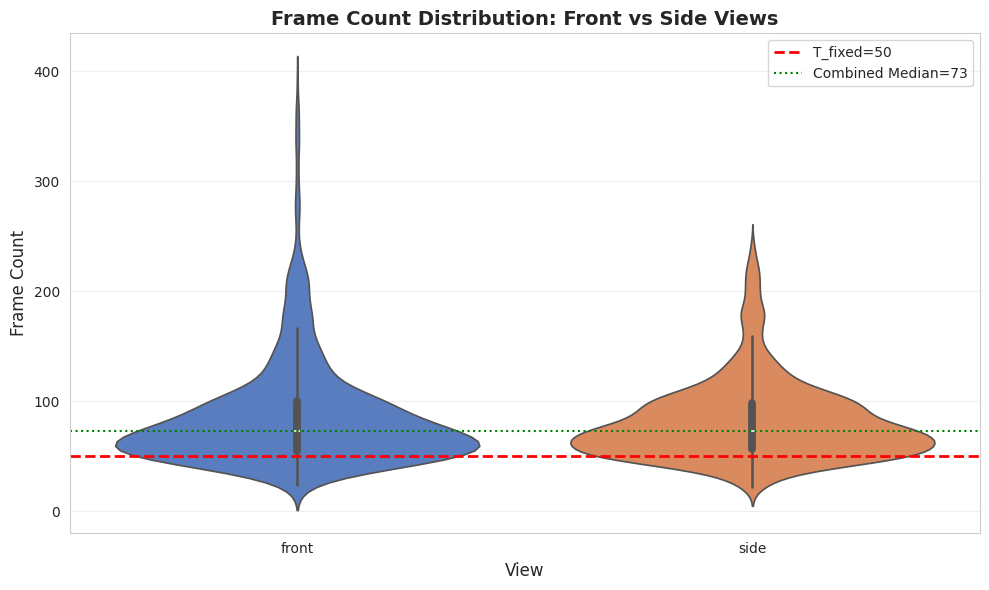

In [11]:
# Violin plot: Front vs Side
df_combined = pd.concat([df_front, df_side], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_combined, x='view', y='total_frames', palette='muted')
plt.axhline(50, color='red', linestyle='--', linewidth=2, label='T_fixed=50')
plt.axhline(df_combined['total_frames'].median(), color='green', linestyle=':', linewidth=1.5,
            label=f'Combined Median={df_combined["total_frames"].median():.0f}')
plt.ylabel('Frame Count', fontsize=12)
plt.xlabel('View', fontsize=12)
plt.title('Frame Count Distribution: Front vs Side Views', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Export Results

In [12]:
# Save combined data
output_dir = project_root / 'plots' / 'frame_distribution_analysis'
output_dir.mkdir(parents=True, exist_ok=True)

csv_path = output_dir / 'frame_metadata_combined.csv'
df_combined.to_csv(csv_path, index=False)
print(f"✅ Metadata saved to: {csv_path}")

# Save summary statistics
summary_path = output_dir / 'frame_analysis_summary.txt'
with open(summary_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("FRAME DISTRIBUTION ANALYSIS SUMMARY\n")
    f.write("="*70 + "\n\n")
    
    for view, df in [('FRONT', df_front), ('SIDE', df_side), ('COMBINED', df_combined)]:
        f.write(f"\n{view} VIEW:\n")
        f.write(f"  Videos: {len(df)}\n")
        f.write(f"  Frame count - Min: {df['total_frames'].min()}, "
                f"Median: {df['total_frames'].median():.0f}, "
                f"Mean: {df['total_frames'].mean():.1f}, "
                f"Max: {df['total_frames'].max()}\n")
        f.write(f"  Duration - Min: {df['duration_sec'].min():.2f}s, "
                f"Median: {df['duration_sec'].median():.2f}s, "
                f"Max: {df['duration_sec'].max():.2f}s\n")
        f.write(f"  FPS values: {sorted(df['fps'].unique())}\n")

print(f"✅ Summary saved to: {summary_path}")
print("\n🎉 Analysis complete!")

✅ Metadata saved to: /mnt/d/Graduation_Project/ai-virtual-coach/plots/frame_distribution_analysis/frame_metadata_combined.csv
✅ Summary saved to: /mnt/d/Graduation_Project/ai-virtual-coach/plots/frame_distribution_analysis/frame_analysis_summary.txt

🎉 Analysis complete!
